## ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА
### HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

<b>Задачи исследования:</b>

Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
А также ответить на ключевые вопросы HR-агентства:
- <i>Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?</i>
- <i>Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?</i>
- <i>Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?</i>
- <i>Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?</i>

Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

### Загрузка библиотек и данных

In [40]:
# Загрузка библиотек
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms 

import matplotlib.pyplot as plt
import seaborn as sns

# визуальные настройки графиков
sns.set_theme('notebook')
sns.set_palette('Set2')

In [41]:
# Загрузка дата-сета
data = pd.read_csv('data/ds_salaries.csv')

# иследуем дата-сет
data.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


### Описательный анализ данных

In [42]:
# исследуем инормацию о файле: размер, пропуски, типы данных
data.info()

# Дата-сет: 12 столбцов 607 строк, пропущенные значения отсутствуют, 5 столбцов с цифровыми данными и 7 столбцов с категориальными данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


### Очистка данных в дата-сете

In [43]:
# Удаление столбца Unnamed по индексу столбца, т.к. он дублирует id строк в дата-сете и будет препятствовать поиску полных дубликатов в дата-сете
data.drop(data.columns[[0]], axis=1, inplace=True)

In [44]:
# Проверка данных на наличие дубликатов
data_dupl = data[data.duplicated()].shape[0]
data_dupl

# В дата-сете имеется 42 дубликата

42

In [45]:
# Удаляем дубликаты и выводим информацию об обновлённом дата-сете
data = data.drop_duplicates()
display(f"Размер дата-сета после удаления дубликатов {data.shape}")

'Размер дата-сета после удаления дубликатов (565, 11)'

### Анализ распределения заработной платы по всем специальностям

c:\Users\dmitr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


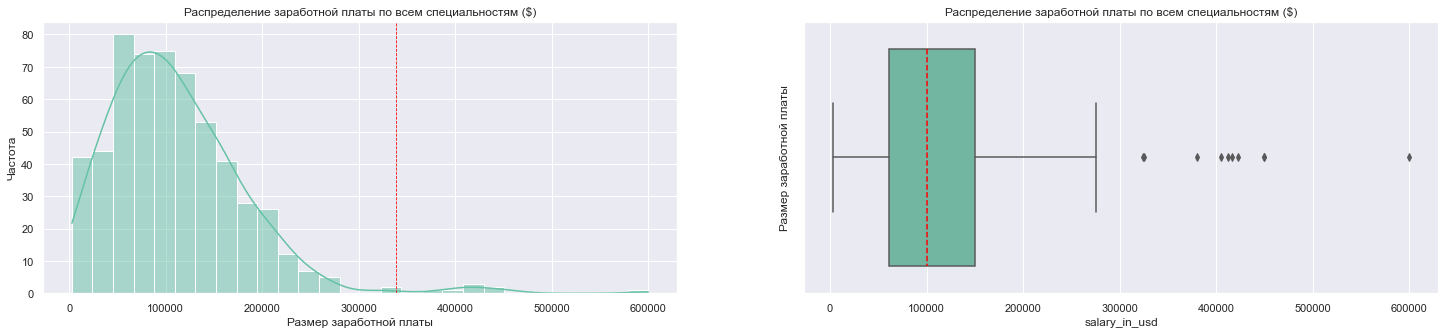

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы', ylabel='Частота')
axes[0].set_title('Распределение заработной платы по всем специальностям ($)')
axes[0].axvline(data['salary'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер заработной платы')
axes[1].set_title('Распределение заработной платы по всем специальностям ($)')

plt.show()



In [47]:
# анализ данных по заработной плате 
data['salary_in_usd'].describe().round(0)

count       565.0
mean     110610.0
std       72281.0
min        2859.0
25%       60757.0
50%      100000.0
75%      150000.0
max      600000.0
Name: salary_in_usd, dtype: float64

In [48]:
# находим медиану по заработной плате
data['salary_in_usd'].median()

100000.0

Распределение заработной платы по всем специальностям отлично от нормального
- на гистограмме средняя смещена вправо и равна 110 610 $<br>
- коробчатая диаграмма показывает, что медиана и средняя не совпадают.<br>
Это подтверждает то, что распределение значений отлично от нормального.<br>
Также видны выбросы.

### Анализ данных, которые могут влиять на заработную плату

<AxesSubplot:>

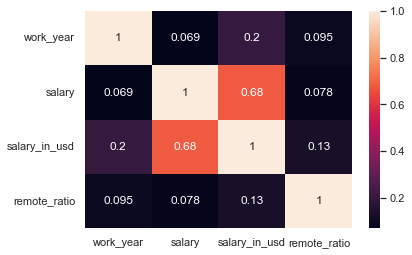

In [49]:
# проведем корреляцию данных по методу Кендалла, т.к. данные распределены ненормально.
sns.heatmap(data.corr(method = 'kendall'), annot = True)

Корреляция показывает, наблюдается слабая связь заработной платы в долларах с годом, когда она была выплачена и сильная связь между заработной платы в долларах и заработной платы общая выплаченная валовая сумма заработной платы.

Создадим функции по определению нормальности данных и верности гипотиз. <br> Зададим alpha = 5%

In [50]:
# функция для принятия решения о нормальности данных
def decision_normality(p):
    print(f"p-value = {p:.3f}")
    if p <= alpha:
        print(f"р-значение меньше, чем заданный уровень значимости {alpha:.2}. Распределение отлично от нормального.")
    else:
        print(f"р-значение больше, чем заданный уровень значимости {alpha:.2}. Распределение является нормальным.")

# функция для принятия решения об отклонении нулевй гипотизы
def decision_gipothesis(p):
    print(f"p-value = {p:.3f}")
    if p <= alpha:
        print(f"р-значение меньше, чем заданный уровень значимости {alpha:.2}. Отвергаем нулевую гипотезу в пользу альтернативной.")
    else:
        print(f"р-значение больше, чем заданный уровень значимости {alpha:.2}. У нас нет оснований отвергнуть нулевую гипотезу.")

# задаем уровень значимости 5%
alpha = 0.05

### 1. Наблюдается ли ежегодный рост зарплат специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ежегодного роста зарплат специалистов Data Scientist не наблюдается.

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза* ($H_1$): наблюдается статистический ежегодный рост зарплат специалистов Data Scientist.

$$ H_1 : μ_1 < μ_2 < μ_3$$

In [51]:
# создаем дата-сет по должности Data Scientist
data_DS = data[data.job_title == 'Data Scientist']
data_DS['work_year'].value_counts()
# в выборке представлены данны по заработной плате за три года: 2022, 2021, 2020

2022    65
2021    44
2020    21
Name: work_year, dtype: int64

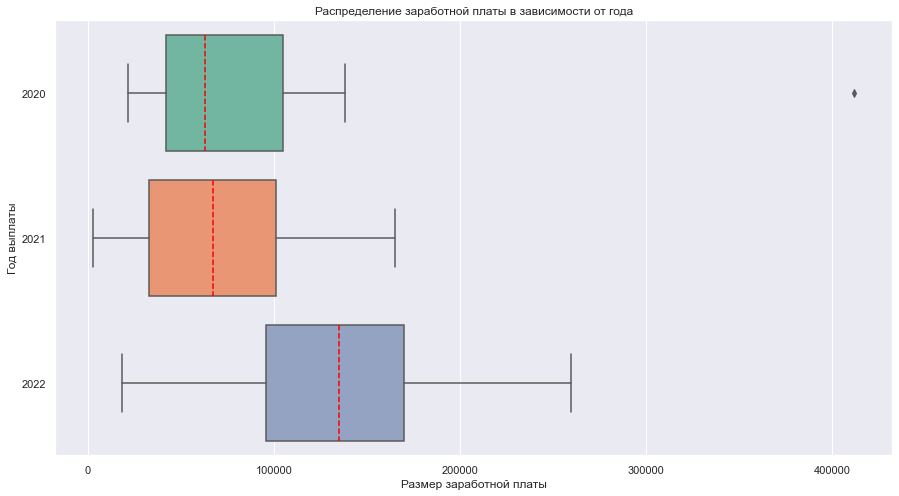

In [52]:
# Строим коробчатые диаграммы распределения заработной платы в зависимости от года
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data_DS, x="salary_in_usd", y="work_year", orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Год выплаты')
plt.title('Распределение заработной платы в зависимости от года')
plt.show()

На диаграмме видно, что бокс "2021" незначительно сместилась ввлево относительно бокса "2020", а бокс "2022" значительно сместился вправо относительно боксов "2020" и "2021". Медианы боксов смещаются в каждом последующем боксе правее - это видно также в таблице ниже "Заработная плата в зависимости от года выплаты". <br> Имеется выброс, не будем обращать на него внимание.

In [53]:
data_DS_agg=data_DS.groupby('work_year')['salary_in_usd'].median().round(2)
print('Медиана заработной платы в зависимости от года выплаты')
data_DS_agg

Медиана заработной платы в зависимости от года выплаты


work_year
2020     62726.0
2021     67233.5
2022    135000.0
Name: salary_in_usd, dtype: float64

Предварительный вывод: у специалистов Data Scientist наблюдается ежегодный рост заработной платы. <br> Проверим это предположение с помощью статистических тестов.

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [54]:
# значения заработной платы по годам
salary_DS_2020 = data_DS.loc[data_DS['work_year']==2020, 'salary_in_usd']
salary_DS_2021 = data_DS.loc[data_DS['work_year']==2021, 'salary_in_usd']
salary_DS_2022 = data_DS.loc[data_DS['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('\n' + 'Для заработной платы в 2020 году:')
result = stats.shapiro(salary_DS_2020)
decision_normality(result[1])

print('\n' + 'Для заработной платы в 2021 году:')
result = stats.shapiro(salary_DS_2021)
decision_normality(result[1])

print('\n' + 'Для заработной платы в 2022 году:')
result = stats.shapiro(salary_DS_2022)
decision_normality(result[1])


Для заработной платы в 2020 году:
p-value = 0.000
р-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.

Для заработной платы в 2021 году:
p-value = 0.107
р-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.

Для заработной платы в 2022 году:
p-value = 0.676
р-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


### Чтобы определить происходит ли ежегодный рост зарплат у специалистов Data Scientist проведем ряд статистический тестов.
<br>1. Определим произошел ли рост зарплаты в 2021 году относительно 2020.
<br>2. Определим произошел ли рост зарплаты в 2022 году относительно 2021.
<br>3. Определим произошел ли рост зарплаты на протяжении 3-х лет с 2020 по 2022 года.

1. Определим произошел ли рост зарплаты в 2021 году относительно 2020 года<br>
*Нулевая гипотеза* ($H_0$): рост зарплаты не наблюдается.

$$ H_0 : μ_1 = μ_2$$

<br>*Альтернативная гипотеза* ($H_1$): наблюдается рост зарплаты.

$$ H_0 : μ_1 < μ_2$$

In [55]:
# определим происходил ли рост зарплат в 2021 году относитель 2020 года.
# Распределение значений зарплат в 2020 году отлично от нормального, а значения зарплат в 2021 году нормальное.
# Тестировать будем две зависимые группы. Значит выбраем непараметрический критерий Уилкоксона.
# Для проведения теста необходимо подать на вход два списка значений одинаковой длины.
# Можно в меньший список добавить необходимое количество значений либо сделать выборку из большего списка, т.е. отсечь необходимое количество значений
# В рамках данного задания сделаем выборку из большего списка.

_, p = stats.wilcoxon(salary_DS_2020, salary_DS_2021[:len(salary_DS_2020)], alternative="greater")
decision_gipothesis(p)

print("Вывод: рост зарплаты в 2021 по отношению к 2020 году не наблюдается")

p-value = 0.226
р-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Вывод: рост зарплаты в 2021 по отношению к 2020 году не наблюдается


2. Определим произошел ли рост зарплаты в 2022 году относительно 2021 года<br>
*Нулевая гипотеза* ($H_0$): рост зарплаты не наблюдается.
$$ H_0 : μ_1 = μ_2$$

<br>*Альтернативная гипотеза* ($H_1$): наблюдается рост зарплаты.
$$ H_0 : μ_1 < μ_2$$

In [56]:
# определим происходил ли рост зарплат в 2022 году относитель 2021 года.
# Распределение значений зарплат в 2021 и 2022 году нормальное.
# Тестировать будем две зависимые группы. Значит выбраем параметрический Парный t-критерий.
# Для проведения теста необходимо подать на вход два списка значений одинаковой длины.
# Можно в меньший список добавить необходимое количество значений либо сделать выборку из большего списка,
# т.е. отсечь необходимое количество значений
# В рамках данного задания дополним список меньшей длины на 21 одно значение медианой.

# длина списка salary_DS_2021 - 45 значений
print('Длина списка salary_DS_2021:',len(salary_DS_2021), 'значений')

#длина ссписка salary_DS_2021 - 65 значений
print('Длина списка salary_DS_2022:',len(salary_DS_2022), 'значений')

# разница длин в 21 значение, дополним список salary_DS_2021 на 21 значений и заполним их медианой

Длина списка salary_DS_2021: 44 значений
Длина списка salary_DS_2022: 65 значений


In [57]:
# создаем список дополнительный списко на 21 значение и заполняем его медианой
df_21 = np.full(shape = 21, fill_value = salary_DS_2021.median(), dtype = np.int)

# расширяем список на 21 значение
df = salary_DS_2021
df_np = pd.DataFrame(df_21)
ser = df_np.iloc[:,0]
salary_DS_2021_ext = df.append(ser, ignore_index = True)

C:\Users\dmitr\AppData\Local\Temp/ipykernel_8644/2251783235.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_21 = np.full(shape = 21, fill_value = salary_DS_2021.median(), dtype = np.int)
C:\Users\dmitr\AppData\Local\Temp/ipykernel_8644/2251783235.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salary_DS_2021_ext = df.append(ser, ignore_index = True)


In [58]:
# список дополнен
salary_DS_2021_ext.tail()

60    67233
61    67233
62    67233
63    67233
64    67233
dtype: int64

In [59]:
# проводим тестирование
_, p = stats.ttest_rel(salary_DS_2021_ext, salary_DS_2022, alternative="greater")
decision_gipothesis(p)

print("Вывод: рост зарплаты в 2022 по отношению к 2021 году не наблюдается")

# в результате тестирования мы не можем отвергнуть нулевую гипотезу
# но, глядя на коробчатую диагамму создалось впечатление, что будет верна альтернативная гипотеза
# при alpha равной 10% мы отвергли бы нулевую гипотезу.

p-value = 1.000
р-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Вывод: рост зарплаты в 2022 по отношению к 2021 году не наблюдается


3.Определим произошел ли рост зарплаты на протяжении 3-х лет с 2020 по 2022 года.
<br>*Нулевая гипотеза* ($H_0$): рост зарплаты не наблюдается.
$$ H_0 : μ_1 = μ_2 = μ_3$$

<br>*Альтернативная гипотеза* ($H_1$): наблюдается рост зарплаты.
$$ H_1 : μ_1 < μ_2 < μ_3$$

In [60]:
# определим происходил ли рост зарплат на протяжении 3-х лет с 2020 по 2021 год.
# Распределение значений зарплат 2021 - не соответстует нормальному, в 2021 и 2022 году нормальное.
# Тестировать будем три зависимые группы. Значит выбраем непараметрический Критерий Фридмана.
# Для проведения теста необходимо подать на вход три списка значений одинаковой длины.
# Можно в меньший список добавить необходимое количество значений либо сделать выборку из большего списка,
# т.е. отсечь необходимое количество значений
# В рамках данного задания не будем дополнять списки медианными значениями.

_, p = stats.friedmanchisquare(salary_DS_2020, salary_DS_2021[:len(salary_DS_2020)], salary_DS_2022[:len(salary_DS_2020)])
decision_gipothesis(p)

print("Вывод: на протяжении 3-х лет с 2020 по 2022 год наблюдается рост зарплаты")


p-value = 0.000
р-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
Вывод: на протяжении 3-х лет с 2020 по 2022 год наблюдается рост зарплаты


### 2. Определить соотношение зарплаты Data Scientist и Data Engineer (на примере 2022 года)
Сформулируем гипотезы<br>
*Нулевая гипотеза* ($H_0$): заработная плата у Data Scientist и Data Engineer не различается.
<br>*Альтернативная гипотеза* ($H_1$): заработная плата у Data Scientists и Data Engineer различается.
$$ H_0 : μ_1 = μ_2 = μ_3$$

Анализ распределения заработной платы для Data Scientist & Data Engineer

In [61]:
# В дата-сете представлены данные по 50 специальностям. 
display(f"Количество специальностей в дата-сете - {data['job_title'].nunique()}")

# Создадим выборку по зарплате только для Data Scientist и Data Engineer за 2022 год
data_DS_DE = data[((data.job_title == 'Data Scientist') | (data.job_title == 'Data Engineer')) & (data.work_year == 2022)]
#data_DS_DE = data[(data.job_title == 'Data Scientist') | (data.job_title == 'Data Engineer')]
data_DS_DE.reset_index(drop=True, inplace=True) # сброс идекса строк
data_DS_DE.info() # В выборке 143 строки, 11 столбцов

'Количество специальностей в дата-сете - 50'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           144 non-null    int64 
 1   experience_level    144 non-null    object
 2   employment_type     144 non-null    object
 3   job_title           144 non-null    object
 4   salary              144 non-null    int64 
 5   salary_currency     144 non-null    object
 6   salary_in_usd       144 non-null    int64 
 7   employee_residence  144 non-null    object
 8   remote_ratio        144 non-null    int64 
 9   company_location    144 non-null    object
 10  company_size        144 non-null    object
dtypes: int64(4), object(7)
memory usage: 12.5+ KB


In [62]:
data_DS_DE["job_title"].value_counts() # проверяем, в выборке присутствуют данные только Data Scientist и Data Engineer

Data Engineer     79
Data Scientist    65
Name: job_title, dtype: int64

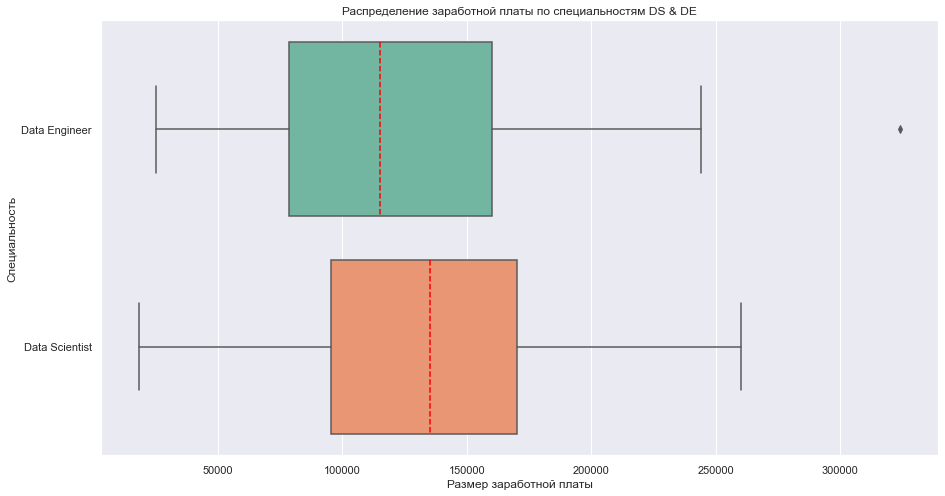

In [63]:
# Строим коробчатые диаграммы для DS & DE в зависимости от заработной платы
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data_DS_DE, x="salary_in_usd", y="job_title", orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Специальность')
plt.title('Распределение заработной платы по специальностям DS & DE')
plt.show()

На диаграмме видно, что бокс DE немного сужен и смещен правее, относительно относительно DS <br> Имеются выбросы, удалим их.

In [64]:
data_DS_DE_agg=data_DS_DE.groupby('job_title')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от специальности')
data_DS_DE_agg

Заработная плата в зависимости от специальности


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


Удаление выбросов

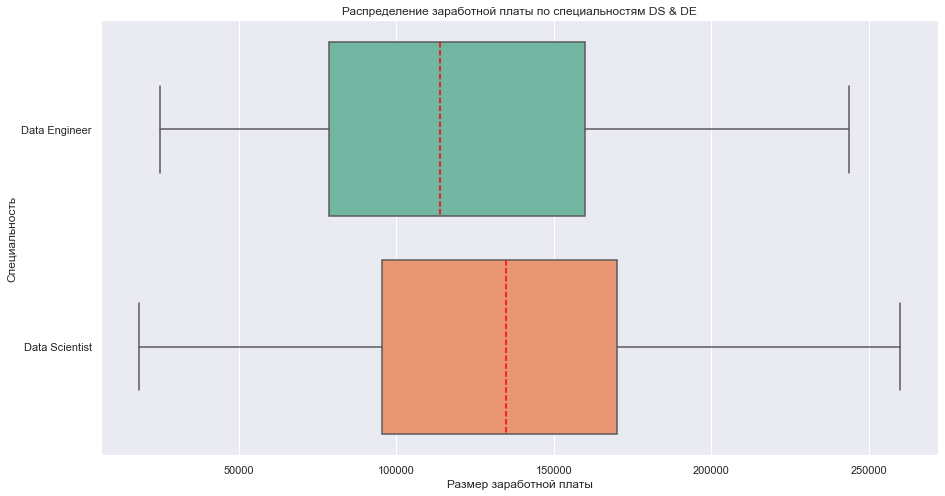

In [65]:
# удалим записи, где заработная плата в долларах больше 300 тыс.$
data_DS_DE = data_DS_DE[data_DS_DE['salary_in_usd'] < 3e+05]

# Строим коробчатые диаграммы для DS & DE в зависимости от
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data_DS_DE, x="salary_in_usd", y="job_title", orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Специальность')
plt.title('Распределение заработной платы по специальностям DS & DE')
plt.show()

Диаграммы не изменились, но выбросы удалены.

**Проверка на нормальность заработной платы у Data Scientist и Data Engineer**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [66]:
# значения заработной платы по специальностям
salary_DS_2022 = data_DS_DE.loc[data_DS_DE['job_title']=='Data Scientist', 'salary_in_usd']
salary_DE_2022 = data_DS_DE.loc[data_DS_DE['job_title']=='Data Engineer', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('\n' + 'Для заработной платы у Data Scientist в 2022 году:')
result = stats.shapiro(salary_DS_2022)
decision_normality(result[1])

print('\n' + 'Для заработной платы у Data Engineer в 2022 году:')
result = stats.shapiro(salary_DE_2022)
decision_normality(result[1])


Для заработной платы у Data Scientist в 2022 году:
p-value = 0.676
р-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.

Для заработной платы у Data Engineer в 2022 году:
p-value = 0.021
р-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


### Чтобы определить соотношение зарплаты Data Scientist и Data Engineer в 2022 году проведем статистическое тестирование.
Сформулируем гипотезы<br>
*Нулевая гипотеза* ($H_0$): заработная плата у Data Scientist и Data Engineer не различается.
$$ H_1 : μ_1 = μ_2 $$

<br>*Альтернативная гипотеза* ($H_1$): заработная плата у Data Scientists и Data Engineer различается.
$$ H_1 : μ_1 \neq μ_2 $$


In [67]:
# Распределение значений зарплат 2022 году у DS нормальное, у DE отлично от нормального.
# Тестировать будем две независимые группы. Значит выбраем непараметрический тест U-критерий Манна-Уитни.

_, p = stats.mannwhitneyu(salary_DS_2022, salary_DE_2022)
decision_gipothesis(p)

print("Вывод: заработная плата у Data Scientist и Data Engineer в 2022 году не различается.")

p-value = 0.255
р-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Вывод: заработная плата у Data Scientist и Data Engineer в 2022 году не различается.


### 3. Анализ соотношений зарплат специалистов Data Scientist в компаниях различных размеров?

In [68]:
# Подготовим выборку по job_title == Data Scientist
data_DS_all_year = data.loc[data['job_title'] == 'Data Scientist']
data_DS_all_year['company_size'].value_counts() # В выборке присутсвуют три типа размера компаний

M    66
L    43
S    21
Name: company_size, dtype: int64

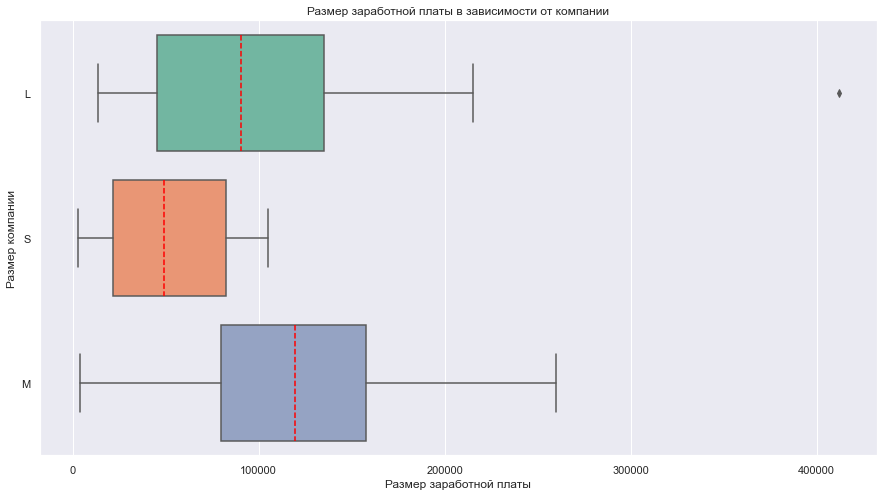

In [69]:
# Строим коробчатые диаграммы в зависимости заработной платы и размера компании
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data_DS_all_year, x="salary_in_usd", y="company_size", orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Размер компании')
plt.title('Размер заработной платы в зависимости от компании')
plt.show()

На корбчатой диаграмме видно, что в средних компания уровень заработной платы на ниже, чем у больших и малых.
<br>Также имеется выброс по строке "L", удалим его.

In [70]:
# Исследуем дата-сет
data_DS_all_year['salary_in_usd'].describe()
# Максимальное значение по зарплате 412 тыс.$, удалим его

count       130.000000
mean     103336.353846
std       63967.562053
min        2859.000000
25%       50330.250000
50%      100000.000000
75%      140400.000000
max      412000.000000
Name: salary_in_usd, dtype: float64

In [71]:
# удалим записи, где заработная плата в долларах больше 412 тыс.$
data_DS_all_year = data_DS_all_year[data_DS_all_year['salary_in_usd'] < 412e+03]
data_DS_all_year['salary_in_usd'].describe()
# Значение удалено.

count       129.000000
mean     100943.612403
std       58083.770431
min        2859.000000
25%       50000.000000
50%      100000.000000
75%      140400.000000
max      260000.000000
Name: salary_in_usd, dtype: float64

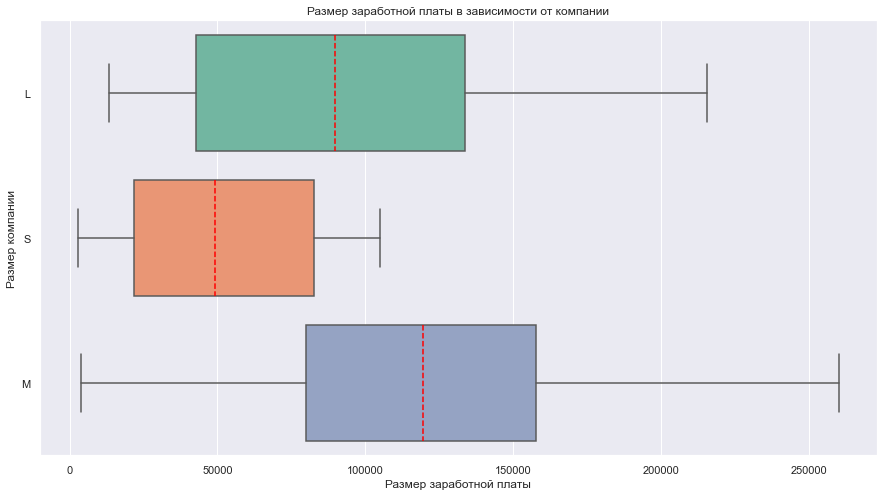

In [72]:
# Повторно строим коробчатые диаграммы в зависимости заработной платы и размера компании без выброса
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data_DS_all_year, x="salary_in_usd", y="company_size", orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Размер компании')
plt.title('Размер заработной платы в зависимости от компании')
plt.show()
# После удаления выброса соотношение не изменилось, но диаграмма стала лучше просматриваться

**Проверка на нормальность распределения значений заработной платы у Data Scietist в зависисмости от размера компании**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [73]:
# Зачение зарплат по типам размеров компаний
salary_L = data_DS_all_year.loc[data_DS_all_year['company_size'] == 'L', 'salary_in_usd']
salary_M = data_DS_all_year.loc[data_DS_all_year['company_size'] == 'M', 'salary_in_usd']
salary_S = data_DS_all_year.loc[data_DS_all_year['company_size'] == 'S', 'salary_in_usd']

In [74]:
# Проводим тест Шапиро-Уилка
print('For company - "L"')
result = stats.shapiro(salary_L)
decision_normality(result[1])

print('\n' + 'For company - "M"')
result = stats.shapiro(salary_M)
decision_normality(result[1])

print('\n' + 'For company - "S"')
result = stats.shapiro(salary_S)
decision_normality(result[1])

For company - "L"
p-value = 0.030
р-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.

For company - "M"
p-value = 0.897
р-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.

For company - "S"
p-value = 0.189
р-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


### Чтобы определить влияет ли на заработную плату Data Scientist размеры компании проведем статистическое тестирование.
Сформулируем гипотезы<br>
*Нулевая гипотеза* ($H_0$): заработная плата у Data Scientist и Data Engineer не различается в зависисмости от размера компании.<br>*Альтернативная гипотеза* ($H_1$): заработная плата у Data Scientist различается в зависисмости от размера компании.

In [75]:
# Тестировать будем три независимые группы. Выбраем непараметрический тест Критерий Краскела-Уоллиса.

_, p = stats.kruskal(salary_L, salary_M, salary_S)
decision_gipothesis(p)

print('\n' + "Вывод: заработная плата Data Scientist различается в зависисмости от размера компании.")

p-value = 0.000
р-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.

Вывод: заработная плата Data Scientist различается в зависисмости от размера компании.


  ### 4. Анализ связи между наличием должностей Data Scientist & Data Engineer и размером компании?

**Формулируем нулевую и альтернативную гипотизы**

* Тип признака должность - категориальный
* Количество сравниваемых групп - 2 гуппы
* Проверяется зависимость групп - Да
* Для проверки гипотезы будем использовать критерий ${\chi}^2$ (хи - квадрат)

*Нулевая гипотеза* ($H_0$): зависимости между наличием должностей Data Scientist & Data Engineer и размером компании нет.

*Альтернативная гипотеза* ($H_1$): существует взаимосвязь между наличием должностей Data Scientist & Data Engineer и размером компании.

In [76]:
# подгтовим выборку по специальностям Data Scientist & Data Engineer
data_DS_DE_x2 = data[((data.job_title == 'Data Scientist') | (data.job_title == 'Data Engineer'))]
data_DS_DE_x2['job_title'].value_counts() # проверка выборки

Data Scientist    130
Data Engineer     121
Name: job_title, dtype: int64

In [77]:
# сосатвим таблицу сопряженности
cross_table = pd.crosstab(data_DS_DE_x2['job_title'], data_DS_DE_x2['company_size'])
cross_table

company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21


In [78]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_gipothesis(p)

print('\n' + "Вывод: между наличием должностей Data Scientist & Data Engineer и размером компании существует зависимость.")

p-value = 0.005
р-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.

Вывод: между наличием должностей Data Scientist & Data Engineer и размером компании существует зависимость.


## Итоговые результаты исследования

- У специалистов Data Scientist наблюдается ежегодный рост зарплат (на протяжении трех лет).
- Размер зарплаты Data Scientist и Data Engineer в 2022 году не различается.
- Зарплаты специалистов Data Scientist различаются в зависимости от размеров копмании. 
- Между наличием должностей Data Scientist и Data Engineer и размером компании существует взаимосвязь.

### Дополнительные результаты

- Рост размера заработной платы у Data Scientist в 2021 году относительно 2020 не наблюдается (на протяжении одного года).
- Рост размера заработной платы у Data Scientist в 2022 году относительно 2021 не наблюдается (на протяжении одного года).